In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kc-house/kc_house_data.csv


The Data
We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df = pd.read_csv('../input/kc-house/kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Exploratory Data Analysis

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

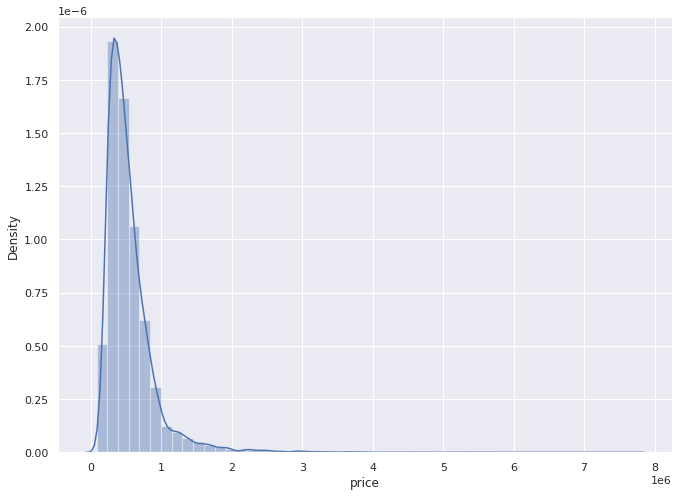

In [8]:
sns.set(rc={'figure.figsize':(11,8)})

sns.distplot(df['price'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

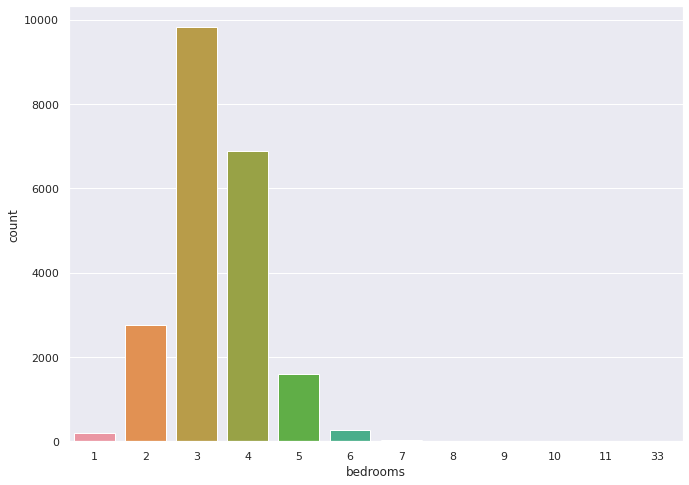

In [9]:
sns.countplot(df['bedrooms'])

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

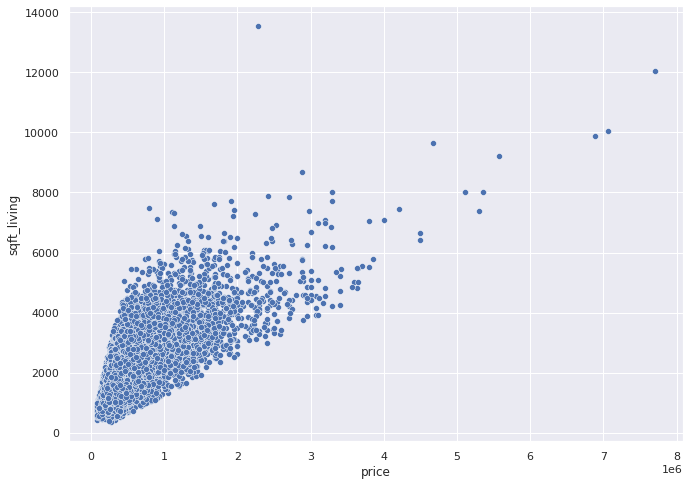

In [10]:
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

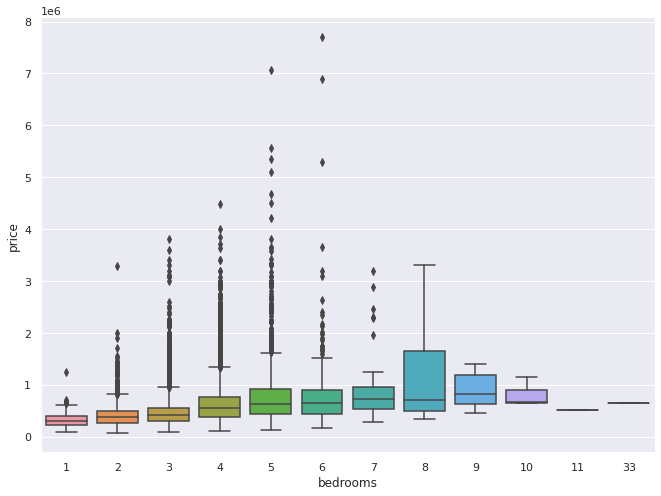

In [11]:
sns.boxplot(x='bedrooms',y='price',data=df)

### Geographical Properties


<AxesSubplot:xlabel='price', ylabel='long'>

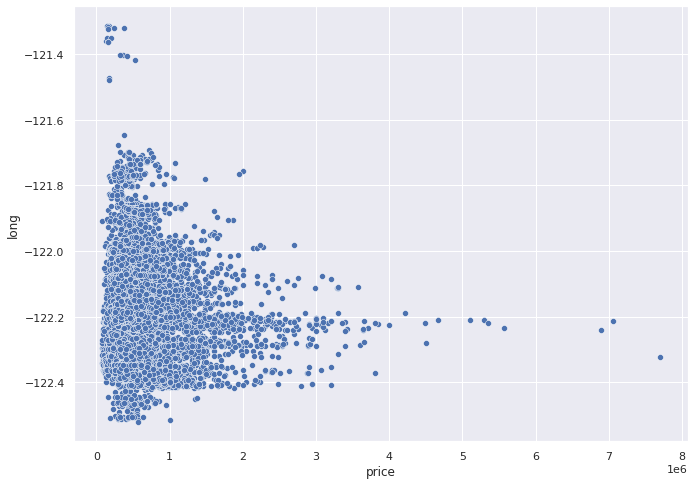

In [12]:
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

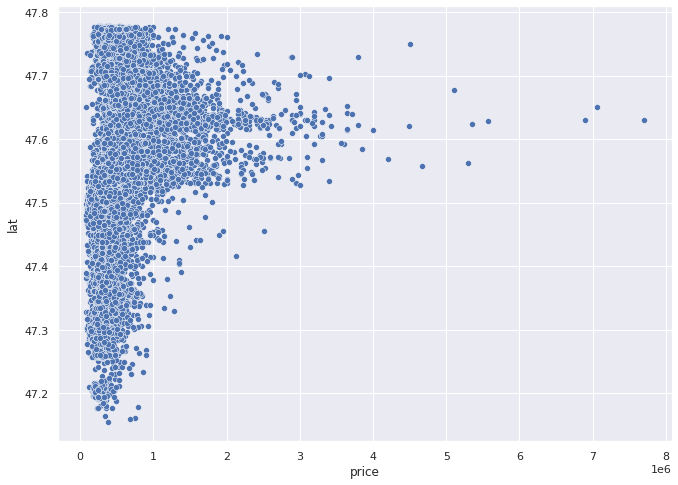

In [13]:
sns.scatterplot(x='price',y='lat',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

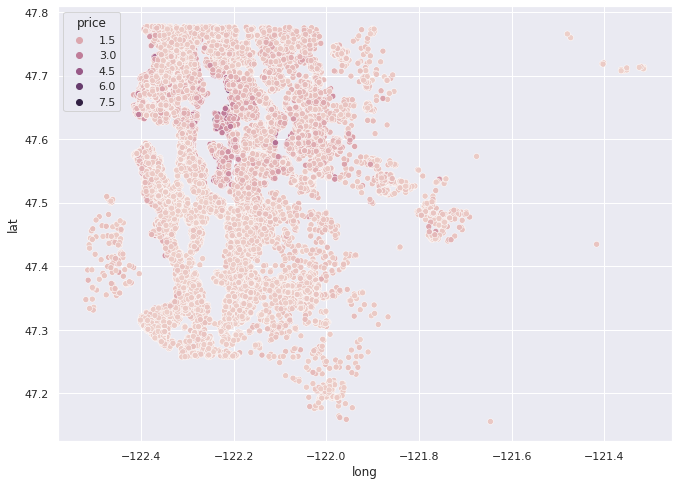

In [14]:
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [15]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [16]:
len(df)*0.01

215.97

In [17]:
non_top_1_per = df.sort_values('price', ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

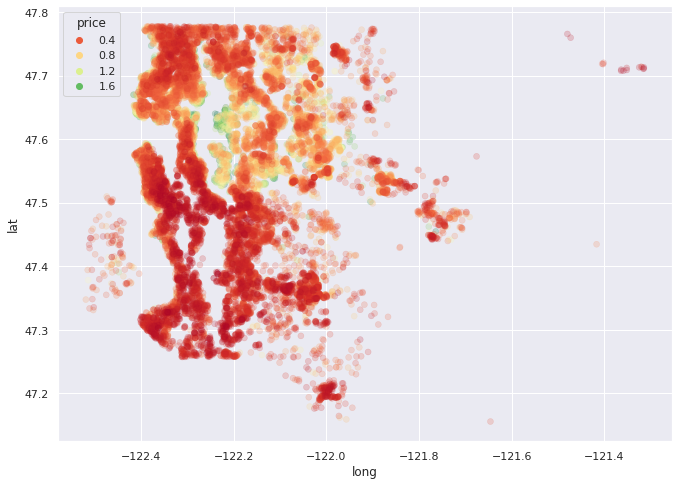

In [18]:
sns.scatterplot(x='long',y='lat',data=non_top_1_per,hue='price',edgecolor=None,
               alpha=0.2,palette='RdYlGn')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

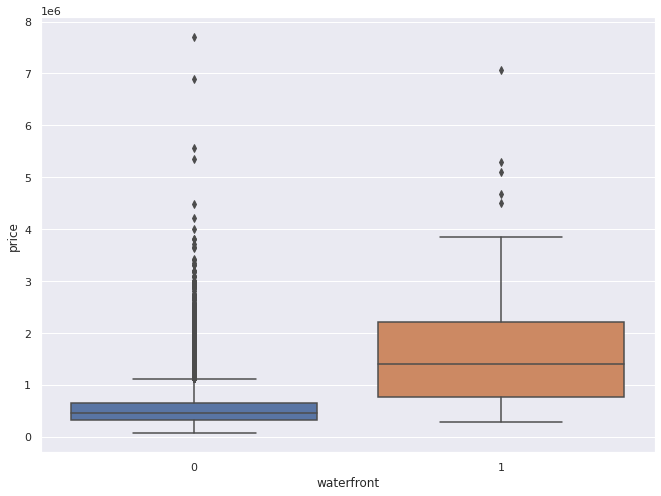

In [19]:
sns.boxplot(x='waterfront',y='price',data=df)

In [20]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
df = df.drop('id', axis=1)

In [22]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [23]:
df['date']= pd.to_datetime(df['date'])

In [24]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [25]:
df['year'] = df['date'].apply(lambda date : date.year)
df['month'] = df['date'].apply(lambda date : date.month)

In [26]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [27]:
df.groupby('month').describe()['price'].sort_values('mean', ascending =False)

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
4,2229.0,562215.615074,370185.322477,84000.0,338900.0,477000.0,669000.0,5350000.0
6,2178.0,557534.318182,388214.092347,92000.0,330000.0,465000.0,665000.0,7060000.0
5,2414.0,550849.746893,373123.107895,78000.0,330000.0,462000.0,646625.0,4210000.0
7,2211.0,544892.161013,346984.162150,86500.0,325000.0,465000.0,653875.0,3800000.0
3,1875.0,544057.683200,355261.128306,81000.0,319925.0,450000.0,655000.0,3400000.0
10,1876.0,539439.447228,399559.604134,89000.0,315000.0,447000.0,640000.0,7700000.0
8,1939.0,536655.212481,370833.668388,107000.0,324848.5,442200.0,640000.0,5570000.0
9,1771.0,529723.517787,372878.789713,85000.0,325000.0,450000.0,624750.0,6890000.0
1,978.0,525963.251534,366325.078718,99000.0,310162.5,438500.0,625000.0,3570000.0


<AxesSubplot:xlabel='month', ylabel='price'>

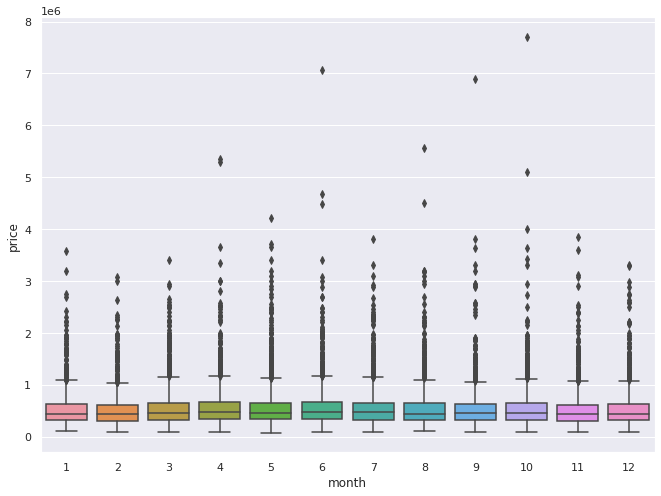

In [28]:
sns.boxplot(x='month', y='price', data=df)

In [29]:
df= df.drop('date', axis=1)

In [30]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [31]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [32]:
df = df.drop('zipcode', axis=1)

In [33]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [34]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
X_train = scaler.fit_transform(X_train)

In [40]:
X_test = scaler.fit_transform(X_test)

In [41]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [42]:
X_train.shape

(15117, 19)

In [43]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

2022-07-18 16:52:56.258618: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [44]:
model.fit(x=X_train,y=y_train,validation_data=(X_test, y_test) ,batch_size= 128,epochs=400)

2022-07-18 16:52:56.506323: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/400
119/119 [==============================] - 1s 6ms/step - loss: 430235418624.0000 - val_loss: 418881273856.0000
Epoch 2/400
119/119 [==============================] - 0s 4ms/step - loss: 428452511744.0000 - val_loss: 412885254144.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 402427314176.0000 - val_loss: 357377933312.0000
Epoch 4/400
119/119 [==============================] - 0s 4ms/step - loss: 286724521984.0000 - val_loss: 194893971456.0000
Epoch 5/400
119/119 [==============================] - 0s 4ms/step - loss: 131147382784.0000 - val_loss: 100047659008.0000
Epoch 6/400
119/119 [==============================] - 0s 4ms/step - loss: 98631163904.0000 - val_loss: 94962638848.0000
Epoch 7/400
119/119 [==============================] - 0s 4ms/step - loss: 96382173184.0000 - val_loss: 92682240000.0000
Epoch 8/400
119/119 [==============================] - 0s 4ms/step - loss: 94117232640.0000 - val_loss: 90715471872.0000
Epoch 9/400
119/119 [=

In [45]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

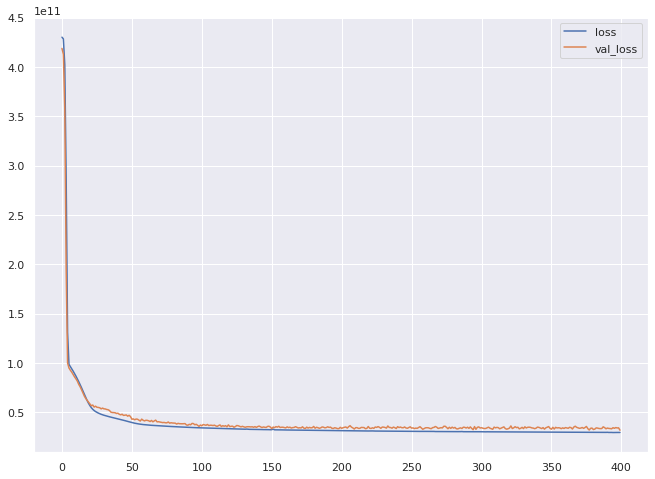

In [46]:
losses.plot()

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score

In [48]:
predictions = model.predict(X_test) 

In [49]:
predictions

array([[340043.25],
       [570167.75],
       [494248.06],
       ...,
       [313077.1 ],
       [481020.78],
       [576577.9 ]], dtype=float32)

In [50]:
mean_absolute_error(y_test, predictions)

110048.41443383487

In [51]:
(mean_squared_error(y_test, predictions))**0.5

178636.16878747792

In [52]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [53]:
5.402966e+05

540296.6

In [54]:
(114142.11123529128/540296.6)*100

21.12582445184576

In [55]:
explained_variance_score(y_test, predictions)

0.7855433078008861

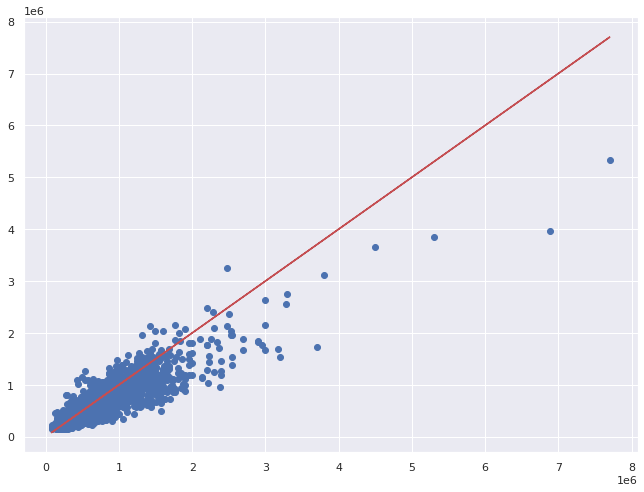

In [56]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [57]:
p_single_house = df.drop('price',axis=1).iloc[0]

In [58]:
p_single_house = scaler.transform(p_single_house.values.reshape(-1, 19))

In [59]:
p_single_house

array([[0.0625    , 0.06666667, 0.05792683, 0.00516884, 0.        ,
        0.        , 0.        , 0.5       , 0.33333333, 0.08453838,
        0.        , 0.47826087, 0.        , 0.56720299, 0.215     ,
        0.13926499, 0.00574235, 0.        , 0.81818182]])

In [60]:
model.predict(p_single_house)

array([[235532.64]], dtype=float32)

## Ceeate model without outliers 

In [61]:
df3 = pd.read_csv('../input/kc-house/kc_house_data.csv')


In [62]:
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [63]:
df3 = df3.drop('id',axis=1)

In [64]:
df3['date'] = pd.to_datetime(df3['date'])

In [65]:
df3['month'] = df3['date'].apply(lambda date:date.month)

In [66]:
df3['year'] = df3['date'].apply(lambda date:date.year)

In [67]:
df3 = df3.drop('date',axis=1)

In [68]:
df3 = df3.drop('zipcode',axis=1)

In [69]:
X = df3.drop('price',axis=1)
y = df3['price']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [71]:
X_train= scaler.fit_transform(X_train)

In [72]:
X_test = scaler.transform(X_test)

In [73]:
from tensorflow.keras.optimizers import Adam

In [74]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [75]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=500)

Epoch 1/500
119/119 [==============================] - 1s 5ms/step - loss: 430228570112.0000 - val_loss: 418851880960.0000
Epoch 2/500
119/119 [==============================] - 0s 4ms/step - loss: 428595544064.0000 - val_loss: 413477371904.0000
Epoch 3/500
119/119 [==============================] - 0s 4ms/step - loss: 408988090368.0000 - val_loss: 370650382336.0000
Epoch 4/500
119/119 [==============================] - 0s 4ms/step - loss: 322847571968.0000 - val_loss: 238552891392.0000
Epoch 5/500
119/119 [==============================] - 1s 5ms/step - loss: 171902681088.0000 - val_loss: 110383185920.0000
Epoch 6/500
119/119 [==============================] - 1s 4ms/step - loss: 102592110592.0000 - val_loss: 94918696960.0000
Epoch 7/500
119/119 [==============================] - 1s 5ms/step - loss: 97360642048.0000 - val_loss: 93389619200.0000
Epoch 8/500
119/119 [==============================] - 0s 4ms/step - loss: 95696429056.0000 - val_loss: 91853840384.0000
Epoch 9/500
119/119 [

In [76]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

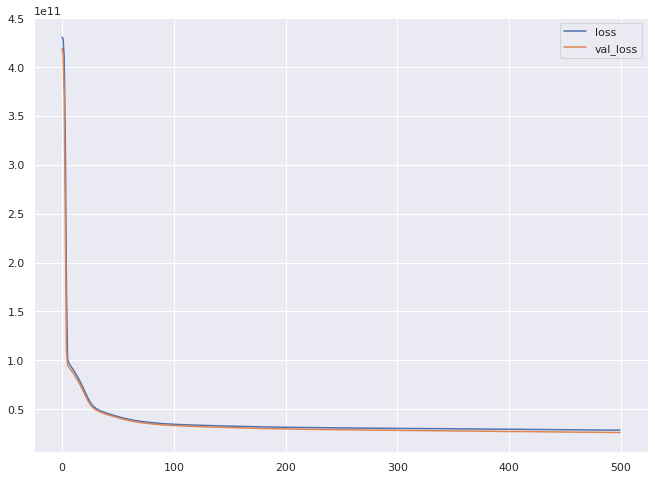

In [77]:
losses.plot()

In [78]:
predictions = model.predict(X_test)

In [79]:
mean_absolute_error(y_test,predictions)

100274.09943214699

In [80]:
explained_variance_score(y_test,predictions)

0.801793725752146

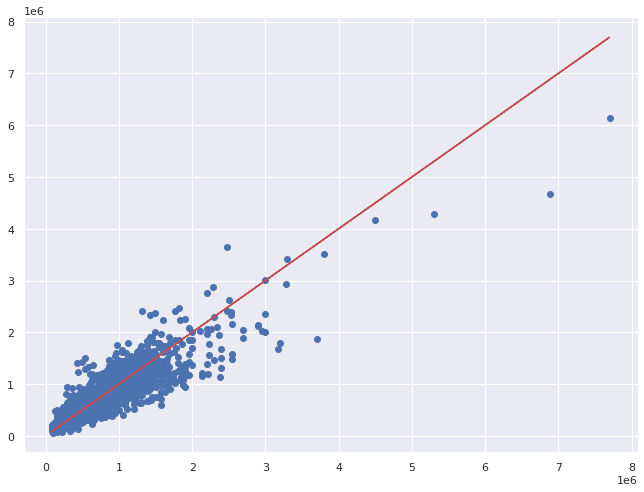

In [81]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [82]:
df3['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [83]:
5.402966e+05

540296.6

In [84]:
(101605.45012176891/540296.6)*100


18.80549500436777